# Solution
## Exercice 1: Basics


1. This is a Supervised Classification problem.
   the task is to predict a binary label (yes or no), making it a classification problem.
2. The person should use an Unsupervised Algorithm.
3. The person should use an Unsupervised Algorithm.


## Exercise 2

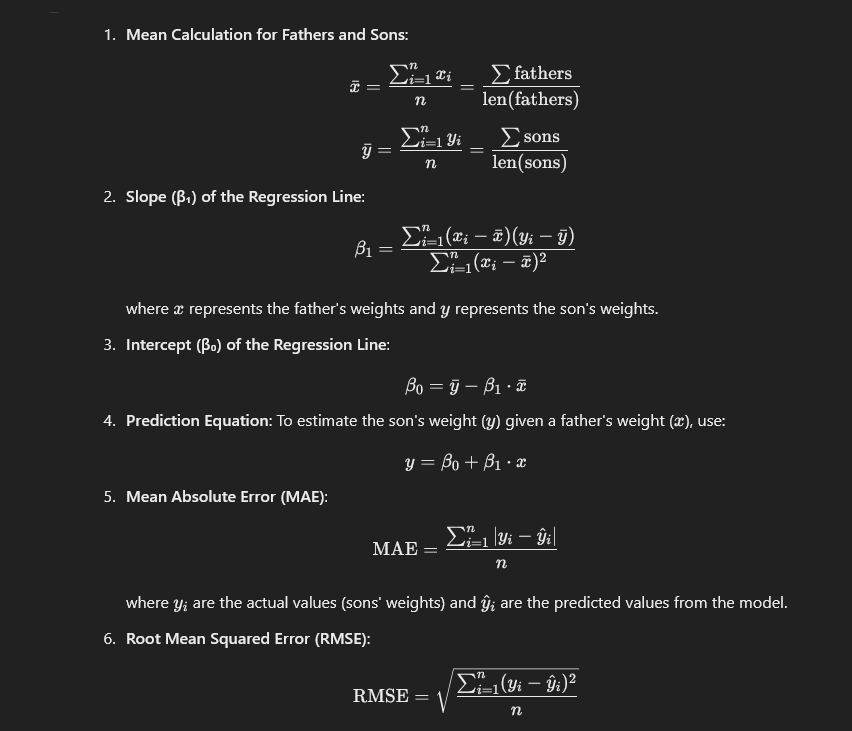

In [1]:
# Given data
fathers = [65, 63, 67, 64, 68, 62, 70, 66, 68, 67, 69, 71]
sons = [68, 66, 68, 65, 69, 66, 68, 65, 71, 67, 68, 70]

# Calculate means
x_mean = sum(fathers)/len(fathers)  # ≈ 66.6667
y_mean = sum(sons)/len(sons)      # ≈ 67.5833

numerator = sum((x-x_mean)*(y-y_mean) for x,y in zip(fathers,sons))
denominator = sum((x-x_mean)**2 for x in fathers)
β1 = numerator/denominator 
print(β1)

β0 = y_mean - β1*x_mean
print(β0)

# 2. 
# To estimate the weight of a son whose father weighs 80 kg:
# y = β₀ + β₁x
# y = 34.3726 + 0.4983(80) = 74.2366 kg


0.4763779527559056
35.82480314960628


In [2]:
# Calculate predicted values
predicted = [β0 + β1*x for x in fathers]

# MAE
mae = sum(abs(y - ŷ) for y, ŷ in zip(sons, predicted))/len(sons)
print(mae)

# RMSE
rmse = (sum((y - ŷ)**2 for y, ŷ in zip(sons, predicted))/len(sons))**0.5
print(rmse)

1.0311679790026258
1.2813650242843826


# Linear Regression with Gradient Descent - Quick Overview

## Key Concepts

### 1. Model Equation
$y = \beta_0 + \beta_1x$

### 2. Important Terms
* **Cost Function (MAE)**: 
  - Formula: $MAE = \frac{1}{n}\sum_{i=1}^n |y^{(i)} - y^{(i)}|$
  - Purpose: Measures how far our predictions deviate from actual data
  - Lower MAE = Better predictions

* **Gradient Descent Updates**:
  - Formulas:
    - $\beta_0^{new} = \beta_0^{old} - \alpha \frac{\partial J}{\partial \beta_0}$
    - $\beta_1^{new} = \beta_1^{old} - \alpha \frac{\partial J}{\partial \beta_1}$
  - Purpose: Iteratively adjusts parameters to minimize cost
  - Learning rate ($\alpha = 0.1$) controls step size

### 3. Process Flow
1. Start with initial parameters ($\beta_0 = 35.8248$, $\beta_1 = 0.4763$)
2. Calculate predictions and error
3. Compute gradients (partial derivatives)
4. Update parameters
5. Repeat until satisfied

### 4. Understanding Results
* If MAE decreases → model is improving
* If MAE increases → learning rate might be too high
* Parameters update in direction that reduces error

## Why We Need Partial Derivatives

To know how to adjust $\beta_0$ and $\beta_1$, we need to understand the slope or the rate of change of the cost function $J$ with respect to each parameter. This is where partial derivatives come in.

A partial derivative tells us how much the cost function $J$ changes as we adjust one of the parameters (while keeping the other constant). In simple terms:

* $\frac{\partial J}{\partial \beta_0}$: Tells us how $J$ changes as we tweak $\beta_0$.
* $\frac{\partial J}{\partial \beta_1}$: Tells us how $J$ changes as we tweak $\beta_1$.

By computing these partial derivatives, we can determine in which direction to change $\beta_0$ and $\beta_1$ to reduce the cost $J$.



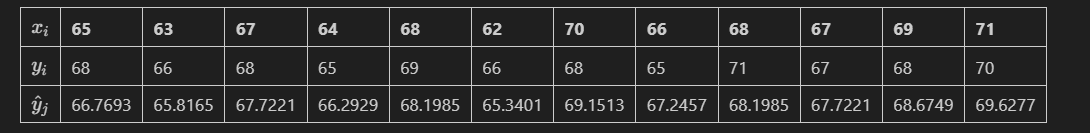

Initial MAE: 1.0318
Gradient for β₀ (d_beta_0): -0.0037
Gradient for β₁ (d_beta_1): -0.2472

Results after one iteration:
New β₀: 0.4763
New β₁: 35.8263
New MAE: 1.0317


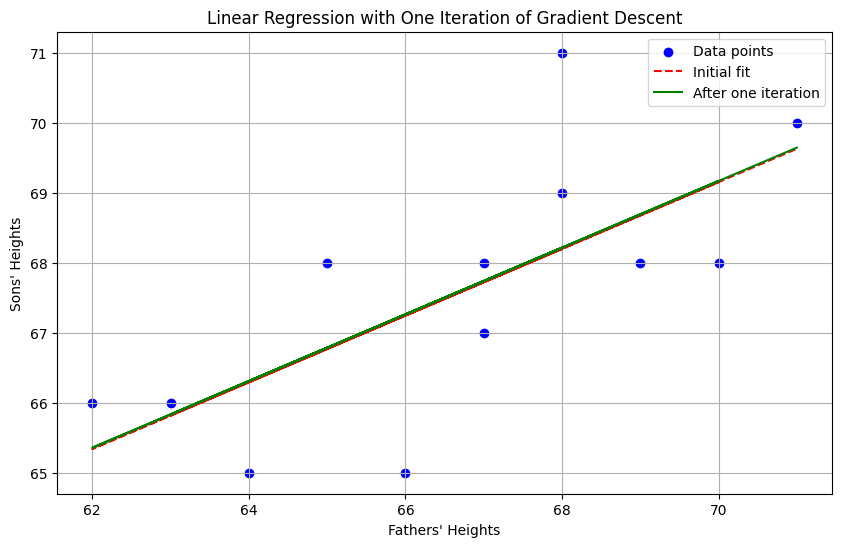

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([65, 63, 67, 64, 68, 62, 70, 66, 68, 67, 69, 71])
y_true = np.array([68, 66, 68, 65, 69, 66, 68, 65, 71, 67, 68, 70])
beta0initial = 0.4763
beta1initial = 35.8263


# Calculate initial MAE
initial_mae = np.mean(np.abs(y_true - (beta0initial * x + beta1initial)))
print(f"Initial MAE: {initial_mae:.4f}")

# Set learning rate (alpha)
alpha = 0.0001

# Calculate gradients
d_beta_0 = -1 / len(x) * np.sum(y_true - (beta0initial * x + beta1initial))
print(f"Gradient for β₀ (d_beta_0): {d_beta_0:.4f}")

d_beta_1 = -1 / len(x) * np.sum((y_true - (beta0initial * x + beta1initial)) * x)
print(f"Gradient for β₁ (d_beta_1): {d_beta_1:.4f}")

# Update parameters using the gradients
beta_0 = beta0initial - alpha * d_beta_0
beta_1 = beta1initial - alpha * d_beta_1

# New prediction and MAE after one iteration
new_y_pred = beta_0 * x + beta_1

# Calculate new MAE
new_mae = np.mean(np.abs(y_true - new_y_pred))

# Output the results
print(f"\nResults after one iteration:")
print(f"New β₀: {beta_0:.4f}")
print(f"New β₁: {beta_1:.4f}")
print(f"New MAE: {new_mae:.4f}")

# Plot the data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(x, y_true, color='blue', label='Data points')
plt.plot(x, y_pred, 'r--', label='Initial fit')
plt.plot(x, new_y_pred, 'g-', label='After one iteration')
plt.xlabel("Fathers' Heights")
plt.ylabel("Sons' Heights")
plt.title("Linear Regression with One Iteration of Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()